- Title: Common Data Transformations
- Date: 2018-12-21
- Tags: statistics, exploratory

It's often useful in performing data analysis to transform some of your variables to fit a common scale; this is especially useful in exploratory data analysis, because these transformations often make it much easier to eyeball the relationship between variables. (Also, some statistical techniques require these transformations.) 

In this short lesson, we'll introduce two common methods of transforming data---the *log transform* and *centering and scaling (a.k.a. standardizing)*, and we'll look at examples of them through the data underlying part of my 2016 book, [The Rule of Law in the Real World](http://rulelaw.net/) (shameless plug). 

Let's start by loading the data and taking a quick look at what it looks like, as well as setting up the libraries we'll need.

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

/Users/pg/.local/share/virtualenvs/library_gobbledygook-NjdFyGcL/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
df = pd.read_csv("http://rulelaw.net/downloads/rol-scores.csv")

In [3]:
df.head()

,State,Pop. In Millions for 2012,RoLScore,elec_pros,pol_plur,free_expr,assoc_org,per_auto,2012GDP,hprop,hfisc,hbiz,hlab,htra,hinv
0,Albania,3.2,42.60,8,10,13,8,9,1.264810e+10,30,92.6,81.0,49.0,79.8,65
1,Argentina,41.1,51.94,11,15,14,11,13,4.755020e+11,15,64.3,60.1,47.4,67.6,40
2,Australia,22.7,73.28,12,15,16,12,15,1.532410e+12,90,66.4,95.5,83.5,86.2,80
3,Austria,8.4,73.15,12,15,16,12,15,3.947080e+11,90,51.1,73.6,80.4,86.8,85
4,Bangladesh,154.7,31.57,9,11,9,8,9,1.163550e+11,20,72.7,68.0,51.9,54.0,55


Looking at this table, we can see that some variables appear to be on radically different scales. In particular, the variable RoLScore (which is a measure of the rule of law) looks like it range from 40-ish to 80-ish, just on this snippet of information, while GDP appears to range, well, that e+xx notation is exponential notation, so it involves numbers with like 10 zeroes after it. 

Actually, this table might turn out ugly when I post it online, so let's just look at an abbreviated version of the table to see.  (Sorry, I still haven't figured out how to get the table layout working right.)

In [4]:
df[["RoLScore", "2012GDP"]].head()

,RoLScore,2012GDP
0,42.60,1.264810e+10
1,51.94,4.755020e+11
2,73.28,1.532410e+12
3,73.15,3.947080e+11
4,31.57,1.163550e+11


Let's create a GDP per capita variable first of all, and then let's look at its relationship to the rule of law. 

In [5]:
df["gdp_percapita"] = df["2012GDP"] / (df["Pop. In Millions for 2012"] * 1000000)

In [6]:
df[["State", "gdp_percapita"]].head(10)

,State,gdp_percapita
0,Albania,3952.529945
1,Argentina,11569.391727
2,Australia,67507.048458
3,Austria,46989.047619
4,Bangladesh,752.133161
5,Belgium,43537.117117
6,Bolivia,2574.772393
7,Bosnia and Herzegovina,4596.304896
8,Botswana,7252.169693
9,Brazil,11336.990438


That seems pretty realistic.  Australia is quite rich, Bangladesh is quite poor, and so forth.

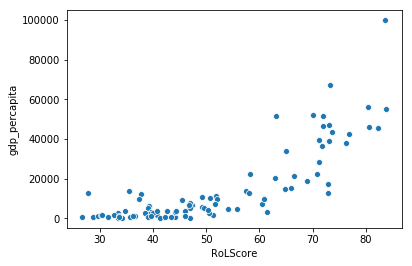

In [7]:
sns.scatterplot(x=df["RoLScore"], y=df["gdp_percapita"])

What's going on here?  If you look at this plot, it looks like rule of law scores are spread out across their range, while GDP seems to be clustered toward the bottom. Maybe we should inspect the distributions of the two variables?

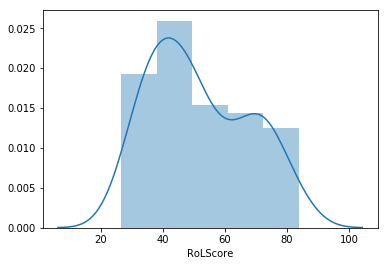

In [8]:
sns.distplot(df["RoLScore"])

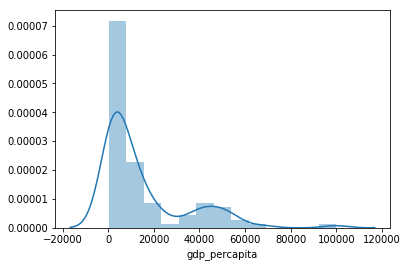

In [9]:
sns.distplot(df["gdp_percapita"])

So they're both obviously a bit skewed, but the rule of law is much less skewed.  In fact, what we see in the GDP data is pretty common for most data involving money: there are way, way, way more points at the low end than at the higher end.  Lots of poor countries, very few super-rich countries like the U.S. This often calls for a logarithmic transformation to understand the relationship between the two data points. 

## Log Transformations

As you may or may not recall from high school math, taking a logarithm is the inverse of exponentiation. That is, the statement $2^3 = 8$ is equivalent to the statement $\log_2 8 = 3$.

Logarithms are a bit tough for human psychology to really have intuitions about, but one good way to think of them is that they are a way of turning differences across orders of magnitude to differences within a single magnitude.  

That is, suppose we had the following data: `[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]`.  The range goes from one to ten million and the difference between the first and the last element is obviously huge.  But if we take the log base 10 of every element in there, we end up with much smaller differences and a much less curvy line representing our datapoints in a graph. 

In [10]:
from math import log10
toydata = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
loggedtoydata = [log10(x) for x in toydata]
print(loggedtoydata)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


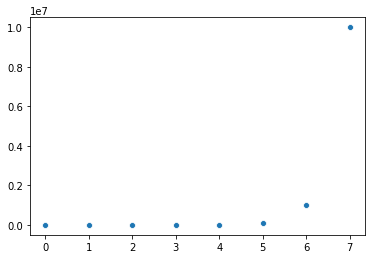

In [11]:
sns.scatterplot(range(0, 8), toydata)

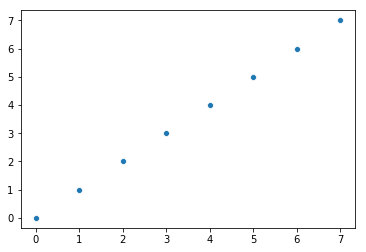

In [12]:
sns.scatterplot(range(0, 8), loggedtoydata)

So let's do that to our gdp to see if it helps us make an interpretable graph. (We'll have to use numpy log functions because they can apply to a series of data just as well as an individual point, so we'll just shadow (overwrite) the `log10` name we originally imported from the Python standard library with one from numpy. This is normally a bad idea.)

In [13]:
from numpy import log10
df["log_gdp"] = log10(df["gdp_percapita"])

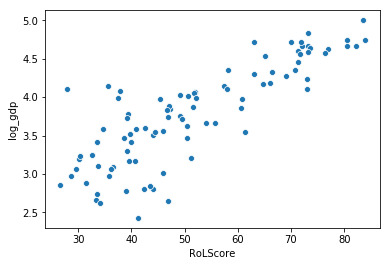

In [14]:
sns.scatterplot(df["RoLScore"], df["log_gdp"])

What we can see is that there's actually a pretty clear relationship between rule of law scores and GDP per capita, after a log transformation. The way to read this graph is that as GDP per capita increases by a factor of 10, rule of law scores seem to increase by, oh, 15 points or thereabouts. This relationship is much harder to see on the original scatterplot.  

Log-transforming data relating to money is often a good idea.

## Centering and Scaling

Centering and scaling is carried out as follows: 

1.  Subtract the mean of the variable from each of its values ("centering" --- this effectively converts the mean of the variable to zero)

2.  Divide each variable by its standard deviation. 

We can easily use more numpy functions to achieve this.

In [15]:
from numpy import mean, std

def center_scale(variable):  # this applies to an entire pandas column
    mu = mean(variable)
    sigma = std(variable)
    return (variable - mu) / sigma

What this will ultimately do is reduce a variable to what we might call *standard deviation units*.  Let's look at another example.  In the dataset we're working with, the variable `hprop` is the heritage foundation [property rights score](https://www.heritage.org/index/property-rights) for 2012, and `assoc_org` is the [Freedom House](https://freedomhouse.org/) associational and organizational rights score.  Observe:

In [16]:
df[['State', 'hprop', 'assoc_org', 'RoLScore']].head(10)

,State,hprop,assoc_org,RoLScore
0,Albania,30,8,42.60
1,Argentina,15,11,51.94
2,Australia,90,12,73.28
3,Austria,90,12,73.15
4,Bangladesh,20,8,31.57
5,Belgium,80,12,73.57
6,Bolivia,10,9,33.51
7,Bosnia and Herzegovina,20,7,55.77
8,Botswana,70,10,60.56
9,Brazil,50,10,51.83


As you can see, again, they're on different scales, which might make it a bit difficult to compare them, especially later on when we try to figure out the magnitude of their relationship with something else.  

For example, suppose we learn from statistical analysis that a one-unit change in the Freedom House score predicts a one-unit change in the Rule of Law Score, but it takes a five-unit change in the Heritage Foundation score to predict a one-unit change in the Rule of Law Score.  What does that mean in terms of the relative predictive power of those two variables?  It's hard to tell, because they're not on a common scale.  A one-unit change in the Freedom House score could be a really big difference, while a five-unit change in the Heritage Foundation score could be a really small difference. They're hard to compare. 

Let's standardize, a.k.a. center and scale, them.  

In [17]:
df["hprop_std"] = center_scale(df["hprop"])
df["assoc_std"] = center_scale(df["assoc_org"])
df[["State", "hprop_std", "assoc_std"]].head(10)

,State,hprop_std,assoc_std
0,Albania,-0.694753,-0.208417
1,Argentina,-1.289323,0.772582
2,Australia,1.683525,1.099582
3,Austria,1.683525,1.099582
4,Bangladesh,-1.091133,-0.208417
5,Belgium,1.287145,1.099582
6,Bolivia,-1.487513,0.118582
7,Bosnia and Herzegovina,-1.091133,-0.535417
8,Botswana,0.890765,0.445582
9,Brazil,0.098006,0.445582


Now we can see that the two variables are on a common scale.  The scale, as I said, is in standard deviation units. In other words, looking at the first row of the table above, we can say that Albania is 0.69 standard deviations below the mean on property rights, and 0.2 standard deviations below the mean on associational/organizational freedoms. 

Thinking about this in terms of the analytic question I posed above, this would allow us to compare the relationship of the two scales on some common third variable---we might say, for example, that a 1 standard deviation increase in property rights predicts a 1 standard deviation increase in the rule of law, while it takes a 3 standard deviation increase in freedom of association to do the same.  This isn't a panacea for comparison, but it can help in a lot of cases.


<hr>
[Download this lesson in PDF]({attach}../images/data-transformations.pdf)
<hr>